# Find areas with no SEZ, SEZ Buffer Method

This notebook identifies areas that are near SEZ, but outsize of the analysis radius of any SEZ, to use as a comparison to the growth of SEZ. 


In [1]:
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio
import rasterio.mask
from rasterio.plot import reshape_as_raster, reshape_as_image, show
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

%run ./lib.py

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')


In [2]:
sez_p = mp.open_package('http://library.metatab.org/worldbank.org-sez-1.1.1.csv')
ntl_p = mp.open_package('http://library.metatab.org/figshare.com-harmonized_ntl-1.1.1.csv')

# Create Dataframes
sez = sez_p.resource('sez').geoframe()





Create a buffer around each SEZ. The outer ring ought to have the same area as the analysis area around the SEZ. For $r_1$ is the radius of the analysis area around the SEZ, and $r_2$ is the radius of the rind around the SEZ analysis area. This makes the comparison area between $r_1$ and $r_2$. 

$$ \begin{gather}
A_1 = \pi r_1^2 \tag{1} \\
A_2 = \pi r_2^2 - A_1 \\
A_2 = A_1 \\
\end{gather}$$

Therefore, $r_2 = \sqrt{2} r_1$


In [10]:
# Create a set of tasks parameters, year and geometry of the SEZ
%run ./lib.py


sez_k = sez[sez.country == 'Korea'].copy()

sez_j, patches, ring_sums = build_ring_sums(ntl_p, sez_k, radius=10_000)

sez_j.head()

2322


ring:   0%|          | 0/2322 [00:00<?, ?it/s]

,id,unique_id,check,latitude,longitude,country_code,country_type_combo,region,country,zone_type,...,city_1m,city_1mdist,city_500k,city_500kdist,500kcity_range,city_300k,city_300kdist,note,geometry,ring
6,6,KOR78,KOR,35.215581,128.602063,KOR,KORFree Trade Zone,EAP,Korea,Free Trade Zone,...,Changwon,10,Changwon,10,Less than 50 km,Changwon,10,NaN,POINT (128.60206 35.21558),"POLYGON ((128.72910 35.21558, 128.72849 35.205..."
13,13,KOR65,KOR,37.480628,126.659656,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,...,Incheon,7,Incheon,7,Less than 50 km,Incheon,7,NaN,POINT (126.65966 37.48063),"POLYGON ((126.78670 37.48063, 126.78609 37.470..."
14,14,KOR33,KOR,36.371032,127.409984,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,...,Daejeon,6,Daejeon,6,Less than 50 km,Daejeon,6,NaN,POINT (127.40998 36.37103),"POLYGON ((127.53702 36.37103, 127.53641 36.360..."
15,15,KOR74,KOR,35.854207,127.096625,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,...,Gwangju,73,Jeonju,6,Less than 50 km,Jeonju,6,NaN,POINT (127.09663 35.85421),"POLYGON ((127.22367 35.85421, 127.22305 35.844..."
18,18,KOR63,KOR,35.944975,126.977547,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,...,Daejeon,70,Jeonju,25,Less than 50 km,Jeonju,25,NaN,POINT (126.97755 35.94497),"POLYGON ((127.10459 35.94497, 127.10398 35.934..."


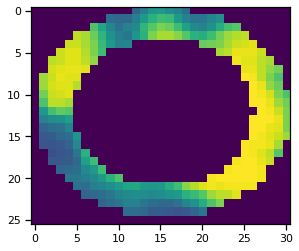

In [4]:
# What do they look like?
plt.imshow(patches[10][2][0,:,:])

,year,sez_id,pix_sum
0,1992,KOR78,7609
1,1993,KOR78,8355
2,1994,KOR78,8738
3,1995,KOR78,11496
4,1996,KOR78,12326


In [7]:
len(t)

2322